In [1]:
import pandas as pd
import numpy as np
import os
import json

In [2]:
# import sys
# sys.path.append("/Users/liangzonglin/workplace/project/baidu/bce-iot/du-home-log")
data_path = "/Users/liangzonglin/workplace/project/baidu/bce-iot/du-home-log/data/version2_0/2024-05-11"
fileNames = os.listdir(data_path)
CSVNames = [fileName for fileName in fileNames if fileName.endswith(".csv")]
CSVNames

['es_origin_data_12:00:00.csv',
 'es_origin_data_06:00:00.csv',
 'es_origin_data_00:00:00.csv',
 'es_origin_data_18:00:00.csv']

In [3]:
dataList = []
for fileName in CSVNames:
    datadf =pd.read_csv(data_path+"/"+fileName)
    dataList.append(datadf)
df = pd.concat(dataList, axis=0, ignore_index=True)

In [4]:
len(df)

146456

In [5]:
ana_DAU = df['deviceId'].nunique()
authcount = df.query('seg=="AUTH2ASR"').shape[0]
unitcount = df.query('seg=="ASR2IOT"').shape[0]
print("2024-5-11:")
print(f"DAU:{str(ana_DAU)}")
print(f"总请求：{str(authcount)}")
print(f"有效请求：{str(unitcount)}")

2024-5-11:
DAU:2392
总请求：24414
有效请求：4935


In [6]:
drop_dup_df = df.drop_duplicates(subset=['logId','seg', 'deviceId'], keep='first')
len(drop_dup_df)

130756

In [7]:
# 删除重复的logId和seg再次查看
drop_dup_df = df.drop_duplicates(subset=['logId','seg'], keep='first')
dup_ana_DAU = drop_dup_df['deviceId'].nunique()
dup_authcount = drop_dup_df.query('seg=="AUTH2ASR"').shape[0]
dup_unitcount = drop_dup_df.query('seg=="ASR2IOT"').shape[0]
print("2024-5-11:")
print(f"DAU:{str(dup_ana_DAU)}")
print(f"总请求：{str(dup_authcount)}")
print(f"有效请求：{str(dup_unitcount)}")

2024-5-11:
DAU:2158
总请求：24414
有效请求：4935


In [8]:
import re

def extractQuery(x):
    contentJsonStr = x['content']
    datanaJsonStr = x["dataana"]
    pattern = r'"query": "(.*?)"'
    match, match1 = None, None
    if pd.notna(contentJsonStr):
        match = re.search(pattern, contentJsonStr)
    if pd.notna(datanaJsonStr):
        match1 = re.search(pattern, datanaJsonStr)
    if match:
        name = match.group(1)
        return name
    elif match1:
        name = match1.group(1)
        return name
    else:
        return ''
df['query'] = df.apply(extractQuery, axis=1)

In [9]:
df['query'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       
1                       
2                       
3                       
4                       
               ...      
146451    拍照看看旁边的大人有没有代理
146452                  
146453                  
146454                  
146455                  
Name: query, Length: 146456, dtype: object>

In [10]:
# 查看每个设备总请求数
device_request_top10 = df[df["seg"]=="AUTH2ASR"][['deviceId', 'seg']].groupby("deviceId").count().sort_values("seg", ascending=False)[:10]
device_request_top10["request_rate"] = device_request_top10['seg']/authcount
device_request_top10

,seg,request_rate
deviceId,,
z4863spgz3n0p6jCWMKoFBsB,4259,0.174449
z4863spgz3n0p6gorzheF4kT,4202,0.172114
z4863spgz3n0p665JrrUj21n,4080,0.167117
z4863spgz3n0p6hassVMXo7K,2580,0.105677
z4863sgc0s8bugSXioOBLvm2,997,0.040837
z4863sgc0s8bugymz55fC3cN,836,0.034243
z4863spgz3n0p6bk1Royuai9,833,0.034120
z4863sgc0s8bug3l1d6G50KF,618,0.025313
z4863spgz3n0p6nIJ3eyohAI,555,0.022733


In [11]:
device_request_top10.columns = ["request_num", "request_rate"]

In [12]:
# device_request_top10.to_csv("device_all_request_ana.csv")

In [13]:
device_index = device_request_top10.index
device_index

Index(['z4863spgz3n0p6jCWMKoFBsB', 'z4863spgz3n0p6gorzheF4kT',
       'z4863spgz3n0p665JrrUj21n', 'z4863spgz3n0p6hassVMXo7K',
       'z4863sgc0s8bugSXioOBLvm2', 'z4863sgc0s8bugymz55fC3cN',
       'z4863spgz3n0p6bk1Royuai9', 'z4863sgc0s8bug3l1d6G50KF',
       'z4863spgz3n0p6nIJ3eyohAI', 'z4863spgz3n0p6bKrleYmPxA'],
      dtype='object', name='deviceId')

In [14]:
# df.loc[df["seg"]=="ASR2IOT" & df["deviceId"].isin(device_index)][].head()
devicetop10df = df[df["deviceId"].isin(device_index)][df['seg']=="ASR2IOT"]

/var/folders/81/j0bvbxw56kx30ybjrybjc9kr0000gn/T/ipykernel_7251/1704434460.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  devicetop10df = df[df["deviceId"].isin(device_index)][df['seg']=="ASR2IOT"]


In [15]:
deviceASRNum = devicetop10df.groupby("deviceId").count()
# deviceASRNum['asr_request_rate'] = deviceASRNum/unitcount
# deviceASRNum[["seg", "asr_request_rate"]]
deviceASRNum

,Unnamed: 0,version,ts,seg,fc,pk,ak,logId,content,dir,messageId,extended,botName,logDate,dataana,query
deviceId,,,,,,,,,,,,,,,,
z4863sgc0s8bug3l1d6G50KF,293,293,293,293,293,293,293,293,293,293,293,0,293,293,293,293
z4863sgc0s8bugSXioOBLvm2,32,32,32,32,32,32,32,32,32,32,32,0,32,32,32,32
z4863sgc0s8bugymz55fC3cN,28,28,28,28,28,28,28,28,28,28,28,0,28,28,28,28
z4863spgz3n0p665JrrUj21n,137,137,137,137,137,137,137,137,137,137,137,0,137,137,137,137
z4863spgz3n0p6bKrleYmPxA,282,282,282,282,282,282,282,282,282,282,282,0,282,282,282,282
z4863spgz3n0p6bk1Royuai9,14,14,14,14,14,14,14,14,14,14,14,0,14,14,14,14
z4863spgz3n0p6gorzheF4kT,94,94,94,94,94,94,94,94,94,94,94,0,94,94,94,94
z4863spgz3n0p6hassVMXo7K,49,49,49,49,49,49,49,49,49,49,49,0,49,49,49,49
z4863spgz3n0p6jCWMKoFBsB,89,89,89,89,89,89,89,89,89,89,89,0,89,89,89,89


In [22]:
df[df['deviceId'].isin(device_index[:7])][["deviceId", "fc", "pk", "ak"]].groupby("deviceId").first().loc[device_index[:7], :].to_excel("error_device_tuple.xlsx")

In [108]:
deviceASRNum["request_unit_rate"] = deviceASRNum['seg']/unitcount
deviceUintInfo = deviceASRNum[['seg', 'request_unit_rate']]
deviceUintInfo.columns = ["unit_num", 'request_unit_rate']

In [109]:
merge_df = pd.merge(device_request_top10, deviceUintInfo, left_index=True, right_index=True)
merge_df

,request_num,request_rate,unit_num,request_unit_rate
deviceId,,,,
z4863spgz3n0p6jCWMKoFBsB,4259,0.174449,89,0.018034
z4863spgz3n0p6gorzheF4kT,4202,0.172114,94,0.019048
z4863spgz3n0p665JrrUj21n,4080,0.167117,137,0.027761
z4863spgz3n0p6hassVMXo7K,2580,0.105677,49,0.009929
z4863sgc0s8bugSXioOBLvm2,997,0.040837,32,0.006484
z4863sgc0s8bugymz55fC3cN,836,0.034243,28,0.005674
z4863spgz3n0p6bk1Royuai9,833,0.034120,14,0.002837
z4863sgc0s8bug3l1d6G50KF,618,0.025313,293,0.059372
z4863spgz3n0p6nIJ3eyohAI,555,0.022733,281,0.056940


In [110]:
merge_df.to_csv('device_all_request_ana.csv')

In [111]:
df.columns

Index(['Unnamed: 0', 'version', 'ts', 'seg', 'deviceId', 'fc', 'pk', 'ak',
       'logId', 'content', 'dir', 'messageId', 'extended', 'botName',
       'logDate', 'dataana', 'query'],
      dtype='object')

In [112]:
# 追踪5-11号异常设备的各个时间短发送的请求数量
def qps(df, device):
        ############## 5 QPS统计  ##############
        def timeshort(tstr):
            return tstr[:-4]
        ana_time = df[(df['seg'] == 'AUTH2ASR')].copy()
        ana_time['ts'] = ana_time['ts'].apply(timeshort)
        qps = ana_time.groupby("ts").agg("count")
        qps = qps.drop(
            columns=['seg', 'deviceId', 'fc', 'pk', 'ak', 'logId', 'content', 'extended', 'dataana', 'messageId'])
        qpsna = qps[(qps['version'] == qps.max().max())]
        print(qpsna)
        return qps

In [113]:
df['ts'][:4]

0    2024-05-11 12:04:30.859
1    2024-05-11 12:04:30.862
2    2024-05-11 12:04:30.895
3    2024-05-11 12:05:00.706
Name: ts, dtype: object

In [114]:
def timeshort(tstr):
    return tstr[:-4]
ana_time = df[(df['seg'] == 'AUTH2ASR')].copy()
ana_time['ts'] = ana_time['ts'].apply(timeshort)
qps = ana_time.groupby("ts").agg("count")
qps = qps.drop(
    columns=['seg', 'deviceId', 'fc', 'pk', 'ak', 'logId', 'content', 'extended', 'dataana', 'messageId'])
qpsna = qps[(qps['version'] == qps.max().max())]
qpsna

,Unnamed: 0,version,dir,botName,logDate,query
ts,,,,,,
2024-05-11 20:38:48,8,8,8,0,0,8


In [115]:
import json

<Axes: xlabel='ts'>

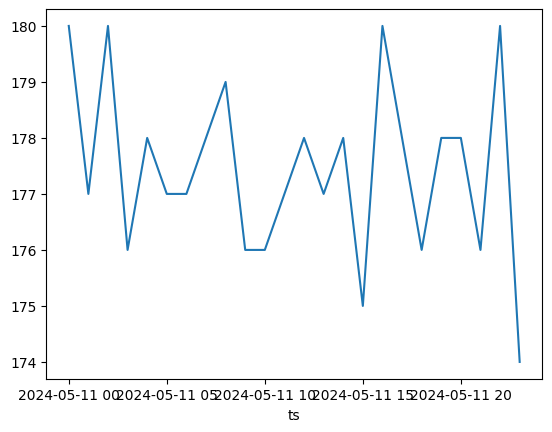

In [116]:
# 选取Top1根据时间分组查看请求变化
import matplotlib.pyplot as plt
def timeshort(tstr):
    return tstr[:-10]
ana_time = df[(df['seg'] == 'AUTH2ASR')].copy()
ana_time['ts'] = ana_time['ts'].apply(timeshort)
deviceId_top1 = "z4863spgz3n0p6jCWMKoFBsB"
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].plot(x='time', y='request_num', kind='line')

In [117]:
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].to_csv("fb_top1.csv")
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].std()

1.6145847942957394

In [118]:
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].std()

1.6145847942957394

<Axes: xlabel='ts'>

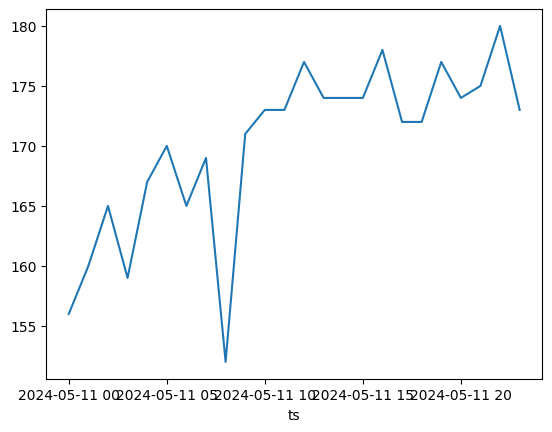

In [119]:
deviceId_top1 = "z4863spgz3n0p665JrrUj21n"
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].plot(x='time', y='request_num', kind='line')

In [120]:
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].to_csv("fb_top2.csv")
ana_time[ana_time['deviceId'] == deviceId_top1].groupby('ts').count()['deviceId'].std()

7.1869446855422146

In [121]:
device_index

Index(['z4863spgz3n0p6jCWMKoFBsB', 'z4863spgz3n0p6gorzheF4kT',
       'z4863spgz3n0p665JrrUj21n', 'z4863spgz3n0p6hassVMXo7K',
       'z4863sgc0s8bugSXioOBLvm2', 'z4863sgc0s8bugymz55fC3cN',
       'z4863spgz3n0p6bk1Royuai9', 'z4863sgc0s8bug3l1d6G50KF',
       'z4863spgz3n0p6nIJ3eyohAI', 'z4863spgz3n0p6bKrleYmPxA'],
      dtype='object', name='deviceId')

In [125]:
len(df)

146456

In [132]:
# request_df = df[df['seg']== "AUTH2ASR"]

for deviceId in device_index:
    count = len(df[df['deviceId'] == deviceId]['query'].value_counts())
    print(f"{deviceId}: {count}")
# 从content和dataana中提取query

z4863spgz3n0p6jCWMKoFBsB: 50
z4863spgz3n0p6gorzheF4kT: 55
z4863spgz3n0p665JrrUj21n: 64
z4863spgz3n0p6hassVMXo7K: 35
z4863sgc0s8bugSXioOBLvm2: 23
z4863sgc0s8bugymz55fC3cN: 24
z4863spgz3n0p6bk1Royuai9: 11
z4863sgc0s8bug3l1d6G50KF: 284
z4863spgz3n0p6nIJ3eyohAI: 276
z4863spgz3n0p6bKrleYmPxA: 270


In [141]:
df[df['deviceId'].isin(device_index[:7])]['query'].value_counts()[:15].to_csv("abnormal_device_query.csv")

In [142]:
df[~df['deviceId'].isin(device_index[:7])]['query'].value_counts()[:15].to_csv("normal_device_query.csv")

In [136]:
df[df['deviceId'] == 'z4863spgz3n0p6hassVMXo7K']['query'].value_counts()

                  5336
云鲸                  12
现在关机                 8
暂停                   6
停                    6
你穿的是不是没穿吗            4
再见                   4
自由自在                 4
快                    4
哦还有一个机               4
不是打扫卫                4
这些是啥意思呢              4
你是点掉了那个框             4
返回基站                 4
你你说的是压一下看有没          4
哦哦名字是说再压一下看看还有       4
我这这                  4
哥们要怎么说               4
ok                   4
还有多久                 2
停机                   2
请关机                  2
现在几点钟                2
嗯                    2
到我这来                 2
拖地                   2
扫地                   2
到                    2
好了那我就还按现在的继续         2
到这来                  2
出来                   2
去                    2
关机啥呀这是你              2
打扫餐厅                 2
快点关机                 2
Name: query, dtype: int64

In [133]:
df[df['deviceId'] == 'z4863sgc0s8bug3l1d6G50KF']['query'].value_counts()

                      1826
拍照看看前面有什么               24
来我这里扫地                  10
厨柜下面有许多面包屑               4
洗手间的洗手台下面有一些纸巾           4
                      ... 
我可以把彩虹永远放在窗边吗            2
次卧的浴室电                   2
餐厅的鞋柜旁有落叶片散落             2
停止工作如果我在烘干模式中停止扫地机       2
明天早上八点预约清理厨房             2
Name: query, Length: 284, dtype: int64